# План

- Функции с итераторами
- Состояния и методы генераторов
- Вложенные генераторы
- Решение задач

# Итераторы

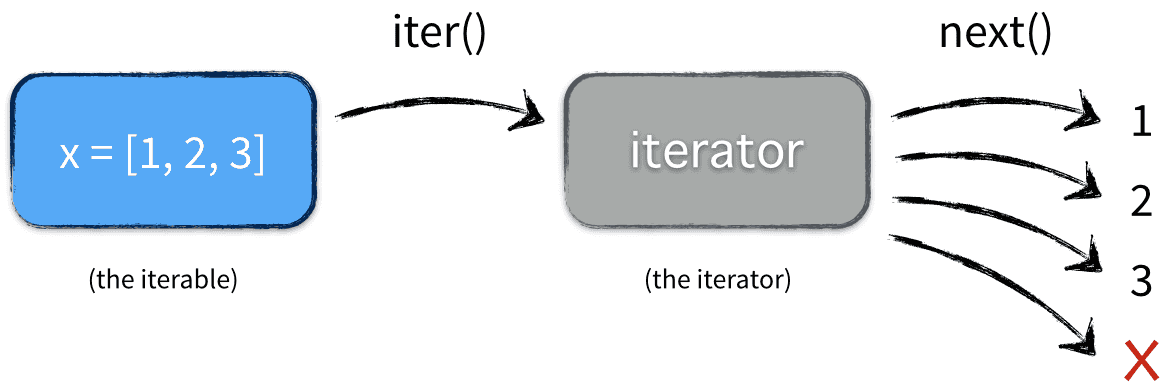

In [ ]:
class SeqIterator:
    # Генератор последовательности
    def __init__(self, sequence):
        self._sequence = sequence
        self._index = 0

    def __iter__(self):
        return self

    def __next__(self):
        if self._index < len(self._sequence):
            item = self._sequence[self._index]
            self._index += 1
            return item
        raise StopIteration

In [ ]:
class SeqIterable:
    # итерируемая последовательность
    def __init__(self, sequence):
        self._sequence = sequence

    def __iter__(self):
        return SeqIterator(self._sequence)

for item in SeqIterable([1, 2, 3]):
    print(item)

## Когда быстрее и лучше работать с Range

В целях экономии памяти компьютера вместо последовательности чисел от 1 до миллиона в виде списка студенты решили создать ленивый итератор numbers с помощью функции range(). Затем в двух разных местах своего скрипта они делали проверку того, есть ли число 2000 в этой коллекции. 
В первом случае код вернул True, а во втором False.

Объясните ошибку и предложите способ исправления ситуации.
 
Код – IDE

```
numbers = iter(range(1, 1000001))
print(2000 in numbers)
print(2000 in numbers)
```

Результат выполнения

```
True
False
```

In [84]:
import sys

numbers = iter(range(1, 1000001))
print(sys.getsizeof(numbers)) # уменьшит память
numbers_range = range(1, 1000001)
print(sys.getsizeof(numbers_range))

# range оптимальна и её не всегда нужно заменять

32
48


В данном случае не было никакого смысла создавать итератор, так как функция range() изначально создает ленивый итерабельный объект, который занимает практически такой же объем памяти.

Как видно, 32 или 48 байт в памяти – никакой разницы, она никак не почувствуется.

Значение False при втором обращении к итератору объясняется тем, что он уже «истощился» – там больше нет числа 2000, как и всех предыдущих, которые меньше.

In [93]:
print(next(numbers)) # последовательность остается на том индексе, где мы закончили

9


## Оптимально по памяти - itertools, но можно и без импорта обойтись

Создайте функцию infinite(lst, tries), которая будет проходиться по элементам списка lst (целые числа) заданное количество раз (tries) циклически. 
Один раз - один элемент списка. 
После вывода последнего значения последовательности процедура начнется с самого начала.

Например, если в списке 2 элемента, а функция получила значение 3, то сначала выведется первый объект, потом последний, а потом опять первый. 
Результат работы функции представьте в виде строки, состоящей из tries количества символов.

In [95]:
def infinite(lst, iterations):
    result = ''
    idx = 0
    
    for _ in range(iterations):
        # внутренний итератор
        if len(lst) > 0:
            result += str(lst[idx])
            idx = (idx + 1) % len(lst)
    return result

# Тесты
print(infinite([2, 5, 8], 7))
print(infinite([], 1000))
print(infinite([7], 4))

2582582

7777


In [13]:
from itertools import cycle # стандартный набор оптимальных по памяти операций

 
def infinite(lst, iterations):
    result = ''
    iter_lst = cycle(lst)
    if lst:
        for symbol in range(iterations):
            result += str(next(iter_lst))
    return result
 
 
# Тесты
print(infinite([2, 5, 8], 7))
print(infinite([], 1000))
print(infinite([7], 4))

2582582

7777


Для решения задачи нужно использовать функцию cycle() из модуля itertools. Она перебирает последовательность циклически, а по мере достижения последнего элемента начинает заново.

Но можно и без itertools

## Встроенные функции map(), filter(), reduce()

In [110]:
def increase(num):
    # увеличить число на 7
    # функциональный стиль
    return num + 7

numbers = [1, 2, 3, 4, 5, 6]
new_numbers = map(increase, numbers)     #  используем встроенную функцию map()

print(new_numbers) # Итерируемый объект
print(list(new_numbers)) # превращает iterable object в список

[8, 9, 10, 11, 12, 13]


In [111]:
def increase(num):
    # увеличить число на 7
    # функциональный стиль
    return num + 7

numbers = [1, 2, 3, 4, 5, 6]
new_numbers = map(increase, numbers)     #  используем встроенную функцию map()

for num in new_numbers:    #  итерируем циклом for
    print(num, end=" ")

8 9 10 11 12 13 

In [104]:
def sum_lists_elem(elem1, elem2, elem3, elem4):
    return elem1 + elem2 + elem3 + elem4

numbers1 = [1, 2, 3, 4, 5]
numbers2 = [10, 20, 30, 40, 50]
numbers3 = [100, 200, 300, 400, 500]
numbers4 = [num for num in range(6)]

new_numbers = list(map(sum_lists_elem, numbers1, numbers2, numbers3, numbers4))  
#  преобразуем итератор в список

print(new_numbers)

[111, 223, 335, 447, 559]


In [112]:
def sum_lists_elem(*args):
    return sum(args) # сумму одинаковых списков

numbers1 = [1, 2, 3, 4, 5]
numbers2 = [10, 20, 30, 40, 50]
numbers3 = [100, 200, 300, 400, 500]
numbers4 = [num for num in range(6)]
numbers5 = [num * 9 for num in range(6)]
numbers6 = [num * 15 for num in range(6)]
numbers7 = [num * 1/2 for num in range(6)]

new_numbers = list(
    map(
        sum_lists_elem, 
        numbers1, 
        numbers2, 
        numbers3, 
        numbers4,
        numbers5,
        numbers6,
        numbers7,
        )
    )  
# преобразуем итератор в список
# ограничитель последовательности

print(new_numbers)

[111.0, 247.5]


In [113]:
circle_areas = [3.56773, 5.57668, 4.31914, 6.20241, 91.01344, 32.01213]

result1 = list(map(round, circle_areas, [1]*6))         # округляем числа до 1 знака после запятой
result2 = list(map(round, circle_areas, range(1, 7)))   # округляем числа до 1,2,...,6 знаков после запятой

print(circle_areas)
print(result1)
print(result2)

[3.56773, 5.57668, 4.31914, 6.20241, 91.01344, 32.01213]
[3.6, 5.6, 4.3, 6.2, 91.0, 32.0]
[3.6, 5.58, 4.319, 6.2024, 91.01344, 32.01213]


In [126]:
circle_areas = input("Введите список ")

result1 = list(map(float, circle_areas.split(", ")))   
result1 = list(map(round, result1, [1]*6)) 

print(circle_areas)
print(result1)

3.56773, 5.57668, 4.31914, 6.20241, 91.01344, 32.01213
[3.6, 5.6, 4.3, 6.2, 91.0, 32.0]


In [121]:
circle_areas = input("Введите список ")

result1 = list(circle_areas)
print(result1)

['[', '3', '.', '5', '6', '7', '7', '3', ',', ' ', '5', '.', '5', '7', '6', '6', '8', ',', ' ', '4', '.', '3', '1', '9', '1', '4', ',', ' ', '6', '.', '2', '0', '2', '4', '1', ',', ' ', '9', '1', '.', '0', '1', '3', '4', '4', ',', ' ', '3', '2', '.', '0', '1', '2', '1', '3', ']']


In [123]:
import ast

circle_areas = input("Введите список ")
number_list = ast.literal_eval(circle_areas) # преобразование списка из ввода
print(number_list)
print(type(number_list[0]))

[3.6, 5.6, 4.3, 6.2, 91.0, 32.0]
<class 'float'>


In [129]:
def positive_elems(elem):
    # цель - фильтрация
    return elem >= 0

numbers = [-1, 2, -3, 4, 0, -20, 10]
positive_numbers = list(filter(positive_elems, numbers))  #  преобразуем итератор в список

print(positive_numbers)

[2, 4, 0, 10]


In [131]:
from functools import reduce # внутрений модуль python

def sum_elem(a, b):
    return a + b

numbers = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 1]
total = reduce(sum_elem, numbers, 0)   # в качестве начального значения 0
print(total)

56


In [132]:
numbers = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 1]
total = reduce(sum_elem, numbers)   # в качестве начального значения будет выбран 1 элемент numbers
print(total)

56


## Дополнительные задачи

### Задача 1. Сократить код с помощью yield

Инструкция yield позволяет создавать генераторы. 

В отличие от объявления return в функции, где возвращается один объект, yield при каждом вызове функции генерирует новый объект. 

Фактически это дает возможность использовать генераторы в циклах. 

Самая важная причина применения такой инструкции - экономия памяти, когда не требуется сохранять всю последовательность, а можно получать ее элементы по одному. 

Ученик написал генератор show_letters(some_str), выводящий все символы строки на печать, но только в том случае, если они являются буквами (остальные игнорируются). 

Сократите код функции.
 
Код – IDE

```
def show_letters(some_str):
    clean_str = ''.join([letter for letter in some_str if letter.isalpha()])
    for symbol in clean_str:
        yield symbol

```

Конструкция yield from позволяет полностью убрать цикл из функции. Она "вкладывает" один генератор внутрь другого, что дает возможность управления несколькими генераторами.

In [15]:
def show_letters(some_str):
	yield from ''.join([letter for letter in some_str if letter.isalpha()])
 
 
random_str = show_letters('A!sdf 09 _ w')
print(next(random_str))
print(next(random_str))

A
s


### Задача 2. Две реализации чисел Фибоначчи

Числа Фибоначчи представляют последовательность, получаемую в результате сложения двух предыдущих элементов. 

Начинается коллекция с чисел 1 и 1. 

Она достаточно быстро растет, поэтому вычисление больших значений занимает немало времени. 
Создайте функцию fib(n), генерирующую n чисел Фибоначчи с минимальными затратами ресурсов.
Для реализации этой функции потребуется обратиться к инструкции yield. 

Она не сохраняет в оперативной памяти огромную последовательность, а дает возможность “доставать” промежуточные результаты по одному.

Необходимо превратить функцию в генератор при помощи инструкции yield, чтобы вычисления осуществлялись не сразу, а по мере надобности.

In [52]:
import sys
sys.set_int_max_str_digits(0)  # Устанавливаем лимит в 0, что означает отсутствие ограничений

def fib(n):
    fib0 = 1
    yield fib0
    fib1 = 1
    yield fib1
    for i in range(n - 2):
        fib0, fib1 = fib1, fib0 + fib1
        yield fib1
 
 
# Тест
for num in fib(112121):
	pass
print(num)

3578717901141606491845297019148106724626820047463822863842602968225704423781815326380325523978250768193056179875472743274270800374054211440819362741021929639383174942994511176846605574634187940742333001357595980386599758158646551138807660757396657310819209134667874615523498462895539924649156337319598215769816982349571758622634436001419857452434384552165642446323226360911052184004867687884752696976426943192728087991781502877026853608906330321756489382197591548020707387440764630270709084798071944807338545135876260412194333237613542074827431657009115471441925203997129551933475671383763922943248869273776339056388549045921552499183632024822497600254316762649576082514297758954596803069790689387206308594539964264796441160113423863919055632803364269884532090867873210350140038359931588970963554011985508204689934661108004125147821941216547766525799611521796309365605313205947617923052851018906264905716157826218915294884851119363044975865553838642792694098330631739577196851922042823428116260323015

In [44]:
class Fibonacci:
    def __init__(self):
        self.prev = 0
        self.curr = 1

    def __iter__(self):
        return self

    def __next__(self):
        value = self.curr
        self.curr += self.prev
        self.prev = value
        return value
    
    def get_nth(self, n):
        if n < 0:
            raise ValueError("n must be non-negative")
        elif n == 0:
            return 0
        else:
            self.prev = 0
            self.curr = 1
            for _ in range(n - 1):
                self.__next__()
            return self.prev

In [51]:
fib = Fibonacci()
fib.get_nth(112122)

3578717901141606491845297019148106724626820047463822863842602968225704423781815326380325523978250768193056179875472743274270800374054211440819362741021929639383174942994511176846605574634187940742333001357595980386599758158646551138807660757396657310819209134667874615523498462895539924649156337319598215769816982349571758622634436001419857452434384552165642446323226360911052184004867687884752696976426943192728087991781502877026853608906330321756489382197591548020707387440764630270709084798071944807338545135876260412194333237613542074827431657009115471441925203997129551933475671383763922943248869273776339056388549045921552499183632024822497600254316762649576082514297758954596803069790689387206308594539964264796441160113423863919055632803364269884532090867873210350140038359931588970963554011985508204689934661108004125147821941216547766525799611521796309365605313205947617923052851018906264905716157826218915294884851119363044975865553838642792694098330631739577196851922042823428116260323015

### Задача 3. Задача о колоде с картами и итераторе

Реализуйте итератор колоды карт (52 штуки) CardDeck. Каждая карта представлена в виде строки типа «2 Пик». При вызове функции next() будет представлена следующая карта. По окончании перебора всех элементов возникнет ошибка StopIteration.

Чтобы реализовать протокол итератора требуется внедрить 2 метода: __iter__() и __next__(). Для понимания того, что коллекция иссякла, не стоить забывать и про ее длину (52).

In [18]:
class CardDeck:
    def __init__(self):
        self.length = 52
        self.index = 0
        self.__SUITS = ['Пик', 'Бубей', 'Червей', 'Крестей']
        self.__RANKS = [*range(2, 11), 'J', 'Q', 'K', 'A']

    def __len__(self):
        return self.length

    def __next__(self):
        if self.index >= self.length:
            raise StopIteration
        else:
            suit = self.__SUITS[self.index // len(self.__RANKS)]
            rank = self.__RANKS[self.index % len(self.__RANKS)]
            self.index += 1
            return f'{rank} {suit}'

    def __iter__(self):
        return self


deck = CardDeck()
while True:
    print(next(deck))

2 Пик
3 Пик
4 Пик
5 Пик
6 Пик
7 Пик
8 Пик
9 Пик
10 Пик
J Пик
Q Пик
K Пик
A Пик
2 Бубей
3 Бубей
4 Бубей
5 Бубей
6 Бубей
7 Бубей
8 Бубей
9 Бубей
10 Бубей
J Бубей
Q Бубей
K Бубей
A Бубей
2 Червей
3 Червей
4 Червей
5 Червей
6 Червей
7 Червей
8 Червей
9 Червей
10 Червей
J Червей
Q Червей
K Червей
A Червей
2 Крестей
3 Крестей
4 Крестей
5 Крестей
6 Крестей
7 Крестей
8 Крестей
9 Крестей
10 Крестей
J Крестей
Q Крестей
K Крестей
A Крестей


StopIteration: 

### Задача 4. Фильтры через итераторы

Одним из самых часто используемых классов в Python является класс **filter**. 

Он принимает в конструкторе два аргумента **a и f** – последовательность и функцию, и позволяет проитерироваться только по **таким элементам x из последовательности a**, что **f(x) равно True**. 

Будем говорить, что в этом случае **функция f допускает элемент x, а элемент x является допущенным**.

Задача реализовать класс **multifilter**, который будет выполнять ту же функцию, что и стандартный класс filter, но будет использовать не одну функцию, а несколько.

Решение о допуске элемента будет приниматься на основании того, сколько функций допускают этот элемент, и сколько не допускают. Обозначим эти количества за pos и neg.

Введем понятие решающей функции – это функция, которая принимает два аргумента – количества pos и neg, и возвращает True, если элемент допущен, и False иначе.

Рассмотрим процесс допуска подробнее на следующем примере.

```
a = [1, 2, 3]
f2(x) = x % 2 == 0 # возвращает True, если x делится на 2
f3(x) = x % 3 == 0
judge_any(pos, neg) = pos >= 1 # возвращает True, если хотя бы одна функция допускает элемент
```
В этом примере мы хотим отфильтровать последовательность a и оставить только те элементы, которые делятся на два или на три.

Функция f2 допускает только элементы, делящиеся на два, а функция f3 допускает только элементы, делящиеся на три. 

Решающая функция допускает элемент в случае, если он был допущен хотя бы одной из функций f2 или f3, то есть элементы, которые делятся на два или на три.

Возьмем первый элемент x = 1.

f2(x) равно False, т. е. функция f2 не допускает элемент x.

f3(x) также равно False, т. е. функция f3 также не допускает элемент x.

В этом случае pos = 0, так как ни одна функция не допускает x, и соответственно neg = 2.

judge_any(0, 2) равно False, значит мы не допускаем элемент x = 1.

Возьмем второй элемент x = 2.

f2(x) равно True

f3(x) равно False

pos = 1, neg = 1

judge_any(1, 1) равно True, значит мы допускаем элемент x = 2.

Аналогично для третьего элемента x = 3.

Таким образом, получили последовательность допущенных элементов [2, 3].

Класс должен обладать следующей структурой:

In [34]:
class multifilter:
    def __init__(self, iterable, *funcs, judge=None):
        # iterable - исходная последовательность
        # funcs - допускающие функции
        # judge - решающая функция

        self.funcs = funcs
        self.iterable = iterable

        if not judge:
            judge = multifilter.judge_any

        self.judge = judge

    @staticmethod
    def judge_half(pos, neg):
        # допускает элемент, если его допускает хотя бы половина фукнций (pos >= neg)
        return pos >= neg

    @staticmethod
    def judge_any(pos, neg):
        # допускает элемент, если его допускает хотя бы одна функция (pos >= 1)
        return any([pos, neg]) and pos >=1

    @staticmethod
    def judge_all(pos, neg):
        # допускает элемент, если его допускают все функции (neg == 0)
        return neg == 0

    def __iter__(self):
        # возвращает итератор по результирующей последовательности
        for value in self.iterable:
            pos = 0
            neg = 0

            for func in self.funcs:
                if func(value):
                    pos += 1
                else:
                    neg += 1

            if self.judge(pos, neg):
                yield value

In [35]:
def mul2(x):
    return x % 2 == 0

def mul3(x):
    return x % 3 == 0

def mul5(x):
    return x % 5 == 0


a = [i for i in range(31)] # [0, 1, 2, ... , 30]

print(list(multifilter(a, mul2, mul3, mul5))) 
# [0, 2, 3, 4, 5, 6, 8, 9, 10, 12, 14, 15, 16, 18, 20, 21, 22, 24, 25, 26, 27, 28, 30]

print(list(multifilter(a, mul2, mul3, mul5, judge=multifilter.judge_half))) 
# [0, 6, 10, 12, 15, 18, 20, 24, 30]

print(list(multifilter(a, mul2, mul3, mul5, judge=multifilter.judge_all))) 
# [0, 30]


[0, 2, 3, 4, 5, 6, 8, 9, 10, 12, 14, 15, 16, 18, 20, 21, 22, 24, 25, 26, 27, 28, 30]
[0, 6, 10, 12, 15, 18, 20, 24, 30]
[0, 30]


### Задача 5. Работа с простыми числами

Целое положительное число называется простым, если оно имеет ровно два различных делителя, то есть делится только на единицу и на само себя.

Например, число 2 является простым, так как делится только на 1 и 2. Также простыми являются, например, числа 3, 5, 31, и еще бесконечно много чисел.

Число 4, например, не является простым, так как имеет три делителя – 1, 2, 4. Также простым не является число 1, так как оно имеет ровно один делитель – 1.

Реализуйте функцию-генератор primes, которая будет генерировать простые числа в порядке возрастания, начиная с числа 2.

In [37]:
def primes():
    def is_prime(n):
        if n < 2:
            return False
        for i in range(2, int(n**0.5) + 1):
            if n % i == 0:
                return False
        return True

    num = 2
    while True:
        if is_prime(num):
            yield num
        num += 1

# Использование функции primes()
primes_gen = primes()


In [38]:
# Теперь используем itertools.takewhile() для получения первых 11 простых чисел до 31
from itertools import takewhile

print(list(takewhile(lambda x: x <= 31, primes_gen)))
# [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31]

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31]


In [39]:
def primes():
    def is_prime(n):
        if n < 2:
            return False
        for i in range(2, int(n**0.5) + 1):
            if n % i == 0:
                return False
        return True

    num = 2
    while True:
        if is_prime(num):
            yield num
        num += 1

# Создаем генератор простых чисел
primes_gen = primes()

# Функция для работы аналогично itertools.takewhile()
def custom_takewhile(predicate, iterable):
    for item in iterable:
        if predicate(item):
            yield item
        else:
            break

# Используем нашу функцию custom_takewhile() для получения первых 11 простых чисел до 31
result = []
for prime in custom_takewhile(lambda x: x <= 31, primes_gen):
    result.append(prime)
    if len(result) == 11:
        break

print(result)
# [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31]

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31]


# Генераторы

**Генераторы** - это специальный класс функций, который позволяет легко создавать свои итераторы. В отличие от обычных функций, генератор не просто возвращает значение и завершает работу, а возвращает итератор, который отдает элементы по одному.

Обычная функция завершает работу, если:

* встретилось выражение return

* закончился код функции (это срабатывает как выражение return None)

* возникло исключение

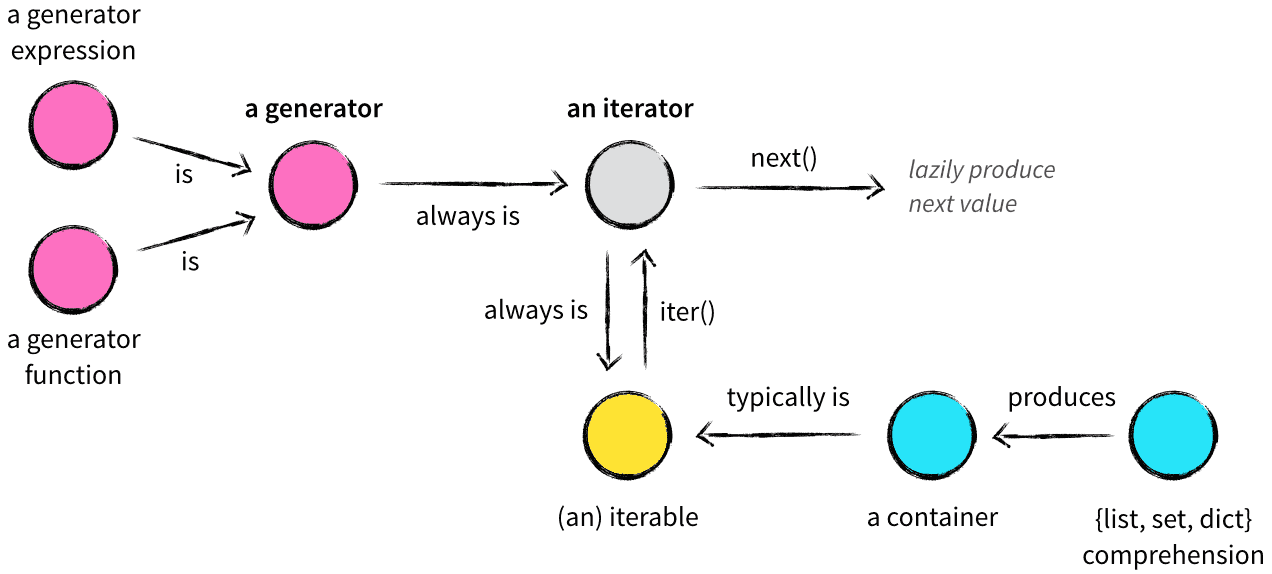

## Функция send

Основная функция метода send() заключается в передаче значений в генератор на стадии yield, чем обеспечивается возможность регулирования их поведения в процессе выполнения. 

Это отличает его от метода next(), который лишь продвигает генератор к следующему значению yield.

In [135]:
def countdown(start):
    # генератор отсчета (обратный отсчет)
    current = start
    while current > 0:
        received = (yield current)
        current = received if received is not None else current - 1

gen = countdown(12345)
print(next(gen))    # напечатает 12345. Запускаем обратный отсчёт.
print(gen.send(123))  # напечатает 123. Это нечто вроде фокуса! Отсчет перезапускается
print(next(gen))    # напечатает 122. Продолжаем обратный отсчёт.

12345
123
122


Из этого примера становится ясно, что метод gen.send(3) перезапускает отсчёт со значения 3. 

Таким образом демонстрируется динамическое управление, к которому позволяет прийти send().

Метод send() создаёт двусторонний канал связи между генераторами. 

Эта двухсторонняя связь делает генераторы корутинами, оптимизированными для асинхронных операций ввода-вывода.

Корутины в Python — это асинхронные функции.

Они выглядят как обычные функции, но перед стандартным ключевым словом def добавляется async.

In [140]:
def user_input_processor():
    # принимаем сообщение и возвращаем его, как echo
    result = ""
    while True:
        user_input = (yield result)
        result = f"Обработано: {user_input}"

processor = user_input_processor()
next(processor)  # Инициализация процессора
# next(next(processor))  # Инициализация процессора, 'str' object is not an iterator
print(processor.send("Привет"))  # напечатает: "Обработано: Привет"
print(processor.send("Мир!"))    # напечатает: "Обработано: Мир!"

Обработано: Привет
Обработано: Мир!


send реально меняет поведение генератора на основе введённых данных, делая генераторы отзывчивыми и адаптируемыми.

Метод send() даёт возможность изменять поведение генератора в реальном времени путём передачи новых значений. 

Это делает генераторы гибкими и быстро реагирующими на изменения вызывающего кода, как видно из нижеприведённого примера кода:

In [144]:
def traffic_light():
    color = 'Зелёный'
    while True:
        color = (yield color)
        color = 'Красный' if color == 'Жёлтый' else 'Зелёный'

light = traffic_light()
print(next(light))        # напечатает 'Зелёный'
print(light.send('Жёлтый')) # напечатает 'Красный'. Стоп!

Зелёный
Красный
Красный


Генераторы, использующие send, способны хранить своё состояние между операторами yield на протяжении всего своего жизненного цикла. 

Эта особенность позволяет реализовать такие варианты использования, как подсчёт промежуточной суммы или машины состояний, что непостижимо для традиционных методов:

In [60]:
def running_total():
    total = 0
    while True:
        addend = (yield total)
        total += addend if addend is not None else 0

accumulator = running_total()
next(accumulator)  # готовим аккумулятор
print(accumulator.send(5))    # прибавляем 5; напечатает 5
print(accumulator.send(10))   # прибавляем 10; напечатает 15

5
15


Здесь через send() к ранее вычисленной сумме аккумулятора добавляются новые значения.

Сочетание методов send() и yield позволяет создать интерактивные шаблоны генераторов. 

Это уже не просто пассивные производители последовательностей. 

Генераторы могут динамически отвечать на внешние команды:

In [61]:
def interactive_quiz():
    score = 0
    question = (yield f"Счёт: {score}. Давайте начнём: сколько будет два плюс два?")
    while True:
        if question == "4":
            score += 1
            question = (yield f"Отлично! Счёт: {score}. Следующий вопрос: какой город является столицей Франции?")
        else:
            question = (yield f"Неверно. Счёт: {score}. Попробуйте ещё раз!")
quizinator = interactive_quiz()
next(quizinator)  # Задаём первый вопрос
print(quizinator.send("4"))  # Последует следующий вопрос

Отлично! Счёт: 1. Следующий вопрос: какой город является столицей Франции?


## Бесконечная последовательность

In [145]:
def is_palindrome(num):
    # Пропуск чисел без разряда 
    # или с одним разрядом
    if num // 10 == 0:
        return False
    
    # преобразуем число в строку 
    # и переворачиваем ее
    line_num = str(num)[::-1]
    
    # в зависимости от типа данных преобразуем
    # перевернутую строку снова в число
    if isinstance(num, int):
        reversed_num = int(line_num)
    elif isinstance(num, float):
        reversed_num = float(line_num)
    else:
        raise TypeError

    # сравниваем числа
    if num == reversed_num:
        return True
 
    return False

In [146]:
def infinite_palindromes():
    # генерация бесконечных палиндромов
    num = 0
    while True:
        if is_palindrome(num):
            i = (yield num) # позволяет получать num при помощь send
            if i is not None:
                num = i
        num += 1

In [147]:
pal_gen = infinite_palindromes()
for i in pal_gen:
    digits = len(str(i))
    pal_gen.send(10 ** digits) # бесконечный генератор

KeyboardInterrupt: 

In [150]:
pal_gen = infinite_palindromes()
for i in pal_gen:
    print(i)
    digits = len(str(i))
    if digits == 10:
        pal_gen.throw(ValueError("Большие палиндромы не нужны")) # остановка по условию и выбрасываем ошибку
    pal_gen.send(10 ** (digits))

11
111
1111
10101
101101
1001001
10011001
100010001
1000110001


ValueError: Большие палиндромы не нужны

In [152]:
MAX_DIGITS = 10
pal_gen = infinite_palindromes()
try:
    for i in pal_gen:
        print(i)
        digits = len(str(i))
        if digits == MAX_DIGITS:
            pal_gen.close()
        pal_gen.send(10 ** (digits))
except StopIteration:
    # Исключение останова генератора обработано
    print(f"Большие палиндромы не нужны, останов на {MAX_DIGITS} значных числах")

11
111
1111
10101
101101
1001001
10011001
100010001
1000110001
Большие палиндромы не нужны, останов на 10 значных числах


## Работает ли send для генератора без сохранения состояния?

В переменную from_10_to_20 при помощи генератора-выражения сохраните последовательность от 10 до 20 включительно

Затем при помощи функции next выведите первые три элемента

И остается вывести оставшиеся элементы в цикле

In [153]:
from_10_to_20 = (i for i in range(10, 21))

# Распечатка первых трех значений
print(next(from_10_to_20))  # 10
print(next(from_10_to_20))  # 11
print(next(from_10_to_20))  # 12

10
11
12


In [154]:
# Вывод оставшихся значений
for value in from_10_to_20:
    print(value)

13
14
15
16
17
18
19
20


In [155]:
from_10_to_20 = (i for i in range(10, 21))
print(from_10_to_20.send(6))

TypeError: can't send non-None value to a just-started generator

In [178]:
def from_10_to_20(min_val, max_val):
    for number in range(min_val, max_val):
        yield number

gen_numbers = from_10_to_20(10, 21)


In [385]:
def from_10_to_20(min_val, max_val):
    current = min_val
    while current < max_val:
        received = (yield current)  # Отправляем текущее значение
        if received is not None:
            current = received  # Если получено новое значение, используем его
        else:
            current += 1  # Увеличиваем текущее значение на 1


In [386]:
gen_numbers_send_test = from_10_to_20(10, 21)

In [388]:
print(next(gen_numbers_send_test))  # Вывод: 10
print(gen_numbers_send_test.send(15))  # Вывод: 15 (текущее значение изменяется на 15)
print(next(gen_numbers_send_test))  # Вывод: 16 (текущее значение увеличивается на 1)
print(gen_numbers_send_test.send(18))  # Вывод: 18 (текущее значение изменяется на 18)
print(next(gen_numbers_send_test))  # Вывод: 19
print(next(gen_numbers_send_test))  # Вывод: 20 (выход за пределы диапазона)

10
15
16
18
19
20


In [389]:
print(next(gen_numbers_send_test))  # Вывод: 20 (выход за пределы диапазона)

StopIteration: 

In [384]:
print(gen_numbers_send_test.send(12))

13


In [362]:
def from_10_to_20(min_val):
    current = min_val
    while True:
        received = (yield current)
        if received is not None:
            received += 1  # Если получено новое значение, используем его
        else:
            current += 1  # Иначе просто увеличиваем текущее значение на 1


In [363]:
gen_numbers = from_10_to_20(22)

In [366]:
print(next(gen_numbers))

24


In [367]:
print(gen_numbers.send(15))

24


## Выражение-генератор для списка строк

Перед вами список words

Необходимо сохранить в переменной lens генератор-выражение, который генерирует длины слов списка words по порядку.

In [272]:
words = ['feel', 'graduate', 'movie', 'fashionable', 'bacon', 'drop', 'produce', 'acquisition',
         'cheap', 'strength', 'master', 'perception', 'noise', 'strange', 'am']

# Создаем генератор-выражение для получения длин слов
lens = (len(word) for word in words)

# Распечатка первых трех значений
print(next(lens))  # Длина первого слова
print(next(lens))  # Длина второго слова
print(next(lens))  # Длина третьего слова

# Вывод оставшихся значений
for value in lens:
    print(value)

4
8
5
11
5
4
7
11
5
8
6
10
5
7
2


## Выражение-генератор для кортежа число месяца и день недели

Давайте напишем выражение-генератор, который будет генерировать кортеж состоящий из двух элементов: названия дня недели и номер дня в году.

За начало отсчета возьмем наш «любимый» 2022 год. Он начался в субботу, потом воскресенье, понедельник, вторник, ..., пятница, суббота и далее по кругу

Результат выражения-генератор сохраните в переменную days

Названия дней недели должны совпадать с этими значениями:

['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
Значит при первой итерации генератор должен вернуть кортеж

(1, 'Saturday')
При второй итерации вернется значение

(2, 'Sunday')
Ваша задача распечатать на удачу 77 первых дней 2022 года. Выводить на экран нужно сами кортежи и первые десять значений в выводе должны выглядеть вот так:

(1, 'Saturday')

(2, 'Sunday')

(3, 'Monday')

(4, 'Tuesday')

(5, 'Wednesday')

(6, 'Thursday')

(7, 'Friday')

(8, 'Saturday')

(9, 'Sunday')

(10, 'Monday')

In [273]:
from datetime import datetime, timedelta

# Определяем начальную дату
start_date = datetime(2025, 1, 1)
# Список названий дней недели
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Генератор для создания кортежей (номер дня, название дня недели)
days = ((i + 1, days_of_week[(start_date + timedelta(days=i)).weekday()]) for i in range(365))


# Печатаем первые 77 дней
for day in range(77):
    print(next(days))

(1, 'Wednesday')
(2, 'Thursday')
(3, 'Friday')
(4, 'Saturday')
(5, 'Sunday')
(6, 'Monday')
(7, 'Tuesday')
(8, 'Wednesday')
(9, 'Thursday')
(10, 'Friday')
(11, 'Saturday')
(12, 'Sunday')
(13, 'Monday')
(14, 'Tuesday')
(15, 'Wednesday')
(16, 'Thursday')
(17, 'Friday')
(18, 'Saturday')
(19, 'Sunday')
(20, 'Monday')
(21, 'Tuesday')
(22, 'Wednesday')
(23, 'Thursday')
(24, 'Friday')
(25, 'Saturday')
(26, 'Sunday')
(27, 'Monday')
(28, 'Tuesday')
(29, 'Wednesday')
(30, 'Thursday')
(31, 'Friday')
(32, 'Saturday')
(33, 'Sunday')
(34, 'Monday')
(35, 'Tuesday')
(36, 'Wednesday')
(37, 'Thursday')
(38, 'Friday')
(39, 'Saturday')
(40, 'Sunday')
(41, 'Monday')
(42, 'Tuesday')
(43, 'Wednesday')
(44, 'Thursday')
(45, 'Friday')
(46, 'Saturday')
(47, 'Sunday')
(48, 'Monday')
(49, 'Tuesday')
(50, 'Wednesday')
(51, 'Thursday')
(52, 'Friday')
(53, 'Saturday')
(54, 'Sunday')
(55, 'Monday')
(56, 'Tuesday')
(57, 'Wednesday')
(58, 'Thursday')
(59, 'Friday')
(60, 'Saturday')
(61, 'Sunday')
(62, 'Monday')
(63, 'Tu

## Генератор чисел Фибоначчи

Ваша задача создать функцию-генератор gen_fibonacci_numbers, которая принимает аргумент n и генерирует n-ое количество чисел Фибоначчи.

Будем считать, что последовательность Фибоначчи такая: 1, 1, 2, 3, 5, 8, 13, 21, 34, ...

In [324]:
def gen_fibonacci_numbers(n):
    a, b = 1, 1
    for _ in range(n):
        yield a
        a, b = b, a + b

In [325]:
for i in gen_fibonacci_numbers(10):
    print(i)

# Будет напечатано
# 1
# 1
# 2
# 3
# 5
# 8
# 13
# 21
# 34
# 55

1
1
2
3
5
8
13
21
34
55


# Список дополнительной литературы

* PEP 342 – Реализация сопрограмм с помощью расширенных генераторов. URL:  https://peps.python.org/pep-0342/
* Выражения — Официальная документация Python 3. URL: https://docs.python.org/3/reference/expressions.html#yieldexpr
* Сопрограммы и задачи — Официальная документация Python 3. URL:  https://docs.python.org/3/library/asyncio-task.html
* Генераторы – Python Wiki — обзор возможностей генераторов с выделением описания метода send. URL: https://wiki.python.org/moin/Generators#The_send_Method
* Python реализация парадигмы event-driven с помощью сопрограмм. URL:  https://habr.com/ru/articles/243207/

* Yield in Python: How Does it Work? https://www.theknowledgeacademy.com/blog/yield-in-python/
* Improve Your Python: 'yield' and Generators Explained https://jeffknupp.com/blog/2013/04/07/improve-your-python-yield-and-generators-explained/
* Generators: The Final Frontier https://www.dabeaz.com/finalgenerator/
* Подробная статья про применение всех возможных вариантов генераторов https://alextereshenkov.github.io/python-basics-generators.html
* Как уменьшить использование памяти и ускорить работу кода на Python с помощью генераторов https://habr.com/ru/companies/otus/articles/477926/
